Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:

# Load the data
df=pd.read_csv('../data/processed/df_filtre.csv', sep="\t", encoding="latin1")

In [21]:
# 2. Vérification des valeurs nulles ou aberrantes (Prévision J == 0)
df_0 = df[df["Consommation"] == 0].copy()  # Suppression des lignes avec Prévision J à zéro
df_0

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison


In [22]:
# 2. Conversion des dates et heures
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Heure"] = pd.to_datetime(df["Heures"], format="%H:%M", errors="coerce").dt.hour

# 3. Extraction de variables temporelles
df["Mois"] = df["Date"].dt.month
df["Jour_du_mois"] = df["Date"].dt.day
df["Semaine"] = df["Date"].dt.isocalendar().week
df["Jour_de_l_annee"] = df["Date"].dt.dayofyear

In [23]:
df

,Type de jour TEMPO,Date,Heures,Prévision J,Prévision J-1,Consommation,Jour,Weekend,Saison,Heure,Mois,Jour_du_mois,Semaine,Jour_de_l_annee
0,BLEU,2014-09-01,00:00,42500.0,42600.0,43320.0,Lundi,0,Automne,0,9,1,36,244
1,BLEU,2014-09-01,00:30,40300.0,40300.0,41174.0,Lundi,0,Automne,0,9,1,36,244
2,BLEU,2014-09-01,01:00,38000.0,37800.0,38430.0,Lundi,0,Automne,1,9,1,36,244
3,BLEU,2014-09-01,01:30,38300.0,37800.0,37800.0,Lundi,0,Automne,1,9,1,36,244
4,BLEU,2014-09-01,02:00,37400.0,37400.0,37137.0,Lundi,0,Automne,2,9,1,36,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224251,BLEU,2025-04-24,22:45,48348.0,48450.0,48824.0,Jeudi,0,Printemps,22,4,24,17,114
224252,BLEU,2025-04-24,23:00,48961.0,49000.0,48320.0,Jeudi,0,Printemps,23,4,24,17,114
224253,BLEU,2025-04-24,23:15,48478.0,48700.0,48274.0,Jeudi,0,Printemps,23,4,24,17,114
224254,BLEU,2025-04-24,23:30,47995.0,48400.0,47519.0,Jeudi,0,Printemps,23,4,24,17,114


Encodage des variables catégorielles

In [24]:
# 4. Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, columns=["Jour", "Saison", "Type de jour TEMPO"], drop_first=False)
df_encoded

,Date,Heures,Prévision J,Prévision J-1,Consommation,Weekend,Heure,Mois,Jour_du_mois,Semaine,...,Jour_Mercredi,Jour_Samedi,Jour_Vendredi,Saison_Automne,Saison_Hiver,Saison_Printemps,Saison_Été,Type de jour TEMPO_BLANC,Type de jour TEMPO_BLEU,Type de jour TEMPO_ROUGE
0,2014-09-01,00:00,42500.0,42600.0,43320.0,0,0,9,1,36,...,False,False,False,True,False,False,False,False,True,False
1,2014-09-01,00:30,40300.0,40300.0,41174.0,0,0,9,1,36,...,False,False,False,True,False,False,False,False,True,False
2,2014-09-01,01:00,38000.0,37800.0,38430.0,0,1,9,1,36,...,False,False,False,True,False,False,False,False,True,False
3,2014-09-01,01:30,38300.0,37800.0,37800.0,0,1,9,1,36,...,False,False,False,True,False,False,False,False,True,False
4,2014-09-01,02:00,37400.0,37400.0,37137.0,0,2,9,1,36,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224251,2025-04-24,22:45,48348.0,48450.0,48824.0,0,22,4,24,17,...,False,False,False,False,False,True,False,False,True,False
224252,2025-04-24,23:00,48961.0,49000.0,48320.0,0,23,4,24,17,...,False,False,False,False,False,True,False,False,True,False
224253,2025-04-24,23:15,48478.0,48700.0,48274.0,0,23,4,24,17,...,False,False,False,False,False,True,False,False,True,False
224254,2025-04-24,23:30,47995.0,48400.0,47519.0,0,23,4,24,17,...,False,False,False,False,False,True,False,False,True,False


Corrélation

In [25]:
# 5. Corrélation entre Prévision J, Prévision J-1 et Consommation
correlation_matrix = df_encoded[["Prévision J", "Prévision J-1", "Consommation"]].corr()
print("Corrélation entre Prévision J, J-1 et Consommation :")
print(correlation_matrix)

Corrélation entre Prévision J, J-1 et Consommation :
               Prévision J  Prévision J-1  Consommation
Prévision J       1.000000       0.989396      0.991003
Prévision J-1     0.989396       1.000000      0.995218
Consommation      0.991003       0.995218      1.000000


##### Consommation vs Prévision J-1 = 0.995
Très forte corrélation positive.

Cela signifie que la consommation réelle est très proche de la prévision faite la veille (J-1).

Ces deux colonnes contiennent presque la même information → attention à la multicolinéarité si vous utilisez les deux dans un modèle linéaire (comme une régression).

##### Consommation vs Prévision J = 0.991
Aussi très corrélée.

La prévision du jour J colle très bien avec la consommation réelle.

Pareil : information redondante avec Prévision J-1.

##### Prévision J vs Prévision J-1 = 0.989
Cela montre que les deux types de prévision (J et J-1) sont très similaires entre elles.

## Visualisation des outliers

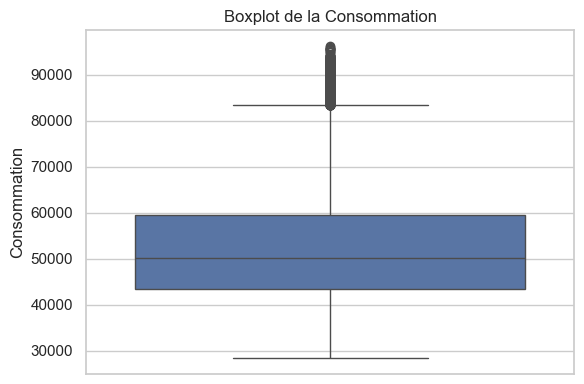

In [26]:
# 6. Visualisation des outliers sur la Consommation uniquement
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Consommation"])
plt.title("Boxplot de la Consommation")
plt.tight_layout()
plt.show()

## Analyse des outliers

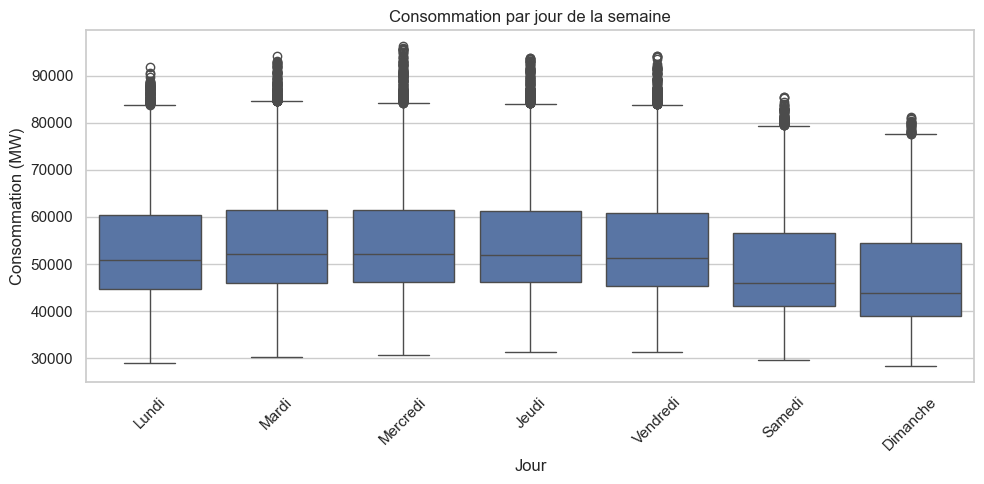

In [27]:
# Configuration du style
sns.set(style="whitegrid")

# 1. Boxplot par jour de la semaine
plt.figure(figsize=(10, 5))
sns.boxplot(x='Jour', y='Consommation', data=df, order=[
    'Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title("Consommation par jour de la semaine")
plt.xlabel("Jour")
plt.ylabel("Consommation (MW)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/boxplot_jour_semaine.png")
plt.show()

📊 Comportement général par jour de la semaine :
Lundi à Vendredi :

La médiane de consommation est plus élevée en semaine (~50 000 MW).

La dispersion (écart interquartile) est relativement stable.

Présence d’outliers nombreux au-dessus de 85 000 MW → pics de consommation pendant les jours ouvrés, possiblement liés à l’activité professionnelle et industrielle.

Samedi & Dimanche :

La médiane chute sensiblement (~42 000 à 45 000 MW).

La consommation est moins variable → les usages résidentiels dominent, plus prévisibles.

Moins d’outliers, et plus resserrés → activité plus homogène le week-end.

🔍 Interprétation et hypothèses :
La semaine est énergivore :

Forte consommation liée aux secteurs tertiaire, industriel, services publics, transports, etc.

D'où la concentration de valeurs élevées et les outliers.

Le week-end est plus sobre :

Fermeture des bureaux et usines.

Seuls les usages domestiques restent constants → courbes plus plates.

Les pics en semaine sont normaux :

Les outliers ne sont pas nécessairement des erreurs mais des comportements réalistes (ex. : grand froid, pics d’activité, événements spéciaux).

✅ Conclusion pratique pour la modélisation :
Élément	Effet constaté	Action recommandée
Jour de la semaine	Impact significatif sur la consommation	✅ À inclure comme variable
Week-end	Forte baisse globale	✅ Peut être binaire utile
Outliers	Fréquents en semaine, rares le week-end	✅ À conserver (car réalistes)

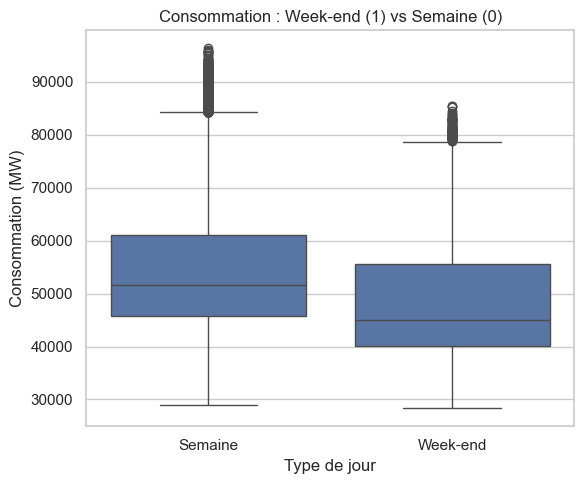

In [28]:
# 2. Boxplot Semaine vs Week-end
plt.figure(figsize=(6, 5))
sns.boxplot(x='Weekend', y='Consommation', data=df)
plt.title("Consommation : Week-end (1) vs Semaine (0)")
plt.xlabel("Type de jour")
plt.ylabel("Consommation (MW)")
plt.xticks([0, 1], ['Semaine', 'Week-end'])
plt.tight_layout()
plt.savefig("../outputs/boxplot_weekend.png")
plt.show()

📊 Interprétation du graphique :
🔹 Semaine :
Médiane élevée (~52 000 MW).

Distribution plus étendue → forte variabilité selon les jours et heures.

Nombreux outliers au-delà de 85 000 MW → pics de consommation (activité professionnelle, industrielle, transports, etc.).

🔹 Week-end :
Médiane plus basse (~44 000 MW).

Moins de dispersion → comportements plus homogènes.

Moins d’outliers → absence d'activité industrielle.

📌 Comparaison directe :
Indicateur	Semaine	Week-end
Médiane	Élevée	Basse
Dispersion	Forte	Modérée
Outliers	Fréquents	Rares
Activité dominante	Pro + résidentielle	Principalement résidentielle

✅ Conclusion :
La consommation est clairement plus forte et plus variable en semaine, à cause de la diversité des usages (bureaux, industries, transports).

Le week-end est plus stable, représentant essentiellement les besoins résidentiels.

Cela confirme la pertinence de la variable Weekend dans la modélisation prédictive.

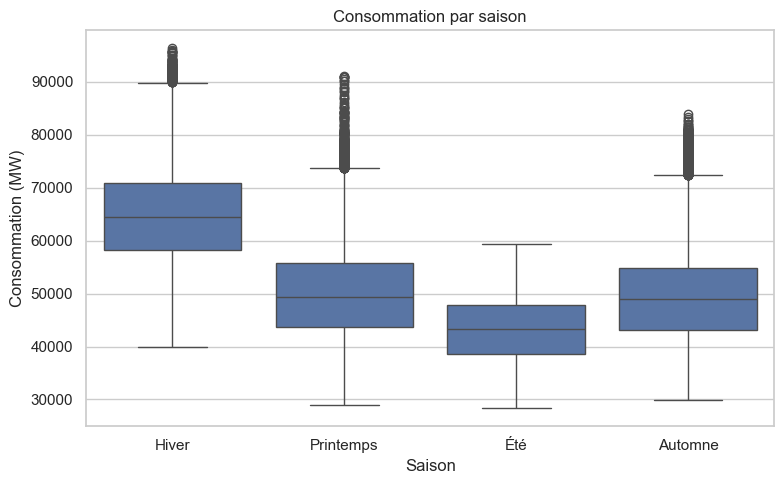

In [29]:

# 3. Boxplot par saison
plt.figure(figsize=(8, 5))
sns.boxplot(x='Saison', y='Consommation', data=df, order=[
    'Hiver', 'Printemps', 'Été', 'Automne'])
plt.title("Consommation par saison")
plt.xlabel("Saison")
plt.ylabel("Consommation (MW)")
plt.tight_layout()
plt.savefig("../outputs/boxplot_saison.png")
plt.show()

📊 Analyse par saison :
❄️ Hiver :
Médiane la plus élevée (~65 000 MW).

Forte dispersion avec de nombreuses valeurs au-dessus de 85 000 MW.

Cela reflète une utilisation massive de chauffage électrique (domestique et professionnel).

Les pics sont fréquents et normaux dans cette saison.

🌸 Printemps :
Médiane autour de 50 000 MW, donc baisse par rapport à l’hiver.

Moins de dispersion, mais encore des pics (probablement des résidus d'utilisation de chauffage au début de saison).

Représente une période de transition.

☀️ Été :
Consommation la plus basse de l’année (~45 000 MW en médiane).

Courbe plus resserrée, peu de valeurs extrêmes → usage plus prévisible.

Peut refléter une moindre activité industrielle (congés) et faible usage de climatisation à grande échelle.

🍂 Automne :
Médiane plus élevée que l’été, autour de 50 000 MW.

Retour progressif de la consommation à cause de la baisse des températures.

Quelques outliers visibles : début de chauffage ou pics ponctuels.

📌 Comparaison globale :
Saison	Médiane	Dispersion	Outliers présents ?	Interprétation principale
Hiver	Élevée	Forte	Oui	Chauffage électrique, forte demande
Printemps	Moyenne	Moyenne	Oui	Transition chauffage
Été	Faible	Faible	Peu	Moins d’activité, peu de climatisation massive
Automne	Moyenne	Moyenne	Oui	Retour progressif du chauffage

# Sauvegarde du fichier encoded

In [30]:
df_encoded.to_csv("../data/processed/df_encoded.csv", sep="\t", index=False, encoding="latin1")